In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.integrate import simps

import astropy.units as u
import astropy.constants as c
lower_lim = (c.c/(((1 * u.Ry).to(u.J))/c.h)).to(u.AA)
upper_lim = (c.c/((((7.354e6) * u.Ry).to(u.J))/c.h)).to(u.AA)

output_dir = 'output/Linear'

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin = 1, vmax = 100)

#AGN_T_ = np.logspace(4, np.log10(1.5e6), 100)
AGN_T_ = np.linspace(1e4, 1.5e6, 100)

Integrals = {}
L_FUV = []
L_Tot = []
L_Inc = []
L_Trans = []
AGN_T = []
for i in range(100):
    
    temp = AGN_T_[i]
    temp = round(int(temp), 3 - len(str(int(temp))))
    i+=1
    cont = np.loadtxt(f'{output_dir}/{i}.cont', delimiter='\t', dtype=str)#, usecols = (0,1,2,3,4,8))
    cont_nu, cont_incident, cont_transmitted, cont_nebular, cont_total, cont_linecont = cont[:,0], cont[:,1], cont[:,2], cont[:,3], cont[:,4], cont[:,8], 

    nu, incident, transmitted, total = np.zeros(len(cont_nu)), np.zeros(len(cont_nu)), np.zeros(len(cont_nu)), np.zeros(len(cont_nu))
    for ii in range(len(nu)):
        nu[ii] = float(cont_nu[ii])
        incident[ii] = float(cont_incident[ii])
        transmitted[ii] = float(cont_transmitted[ii])
        total[ii] = float(cont_total[ii])
        
        
    l_tot, l_inc, l_trans, l_fuv, nu_fuv = [], [], [], [], []
    for i in range(len(nu)):
        l_tot.append(total[i]/nu[i])
        l_inc.append(incident[i]/nu[i])
        l_trans.append(transmitted[i]/nu[i])
        if nu[i] < upper_lim/u.AA:
            continue
        elif nu[i] > lower_lim/u.AA:
            continue
        else:
            nu_fuv.append(nu[i])
            l_fuv.append(total[i]/nu[i])
    '''print(('-'*10)+str(temp)+('-'*10))
    print(len(nu))
    print(len(nu_fuv))'''
    l_tot_int = simps(np.flip(l_tot), np.flip(nu))
    l_inc_int = simps(np.flip(l_inc), np.flip(nu))
    l_trans_int = simps(np.flip(l_trans), np.flip(nu))
    l_fuv_int = simps(np.flip(l_fuv), np.flip(nu_fuv))
    
    L_FUV.append(l_fuv_int)
    L_Tot.append(l_tot_int)
    L_Inc.append(l_inc_int)
    L_Trans.append(l_trans_int)
    AGN_T.append(temp)
        
Integrals.update({"L_FUV":L_FUV})
Integrals.update({"L_Tot":L_Tot})
Integrals.update({"L_Inc":L_Inc})
Integrals.update({"L_Trans":L_Trans})
Integrals.update({"AGN_T":AGN_T})

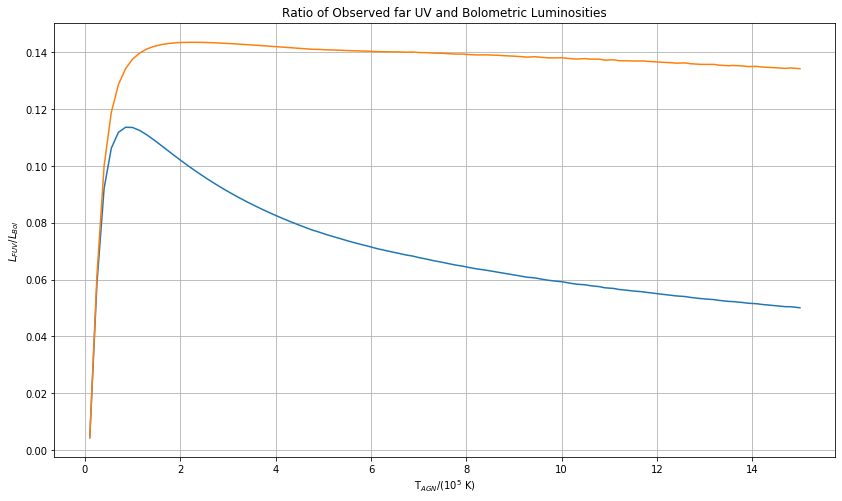

In [14]:
y1, y2 = [], []
for ii in range(len(Integrals["L_FUV"])):
    y1.append(Integrals["L_FUV"][ii]/Integrals["L_Inc"][ii])
    y2.append(Integrals["L_FUV"][ii]/Integrals["L_Tot"][ii])

x = []
for j in range(len(Integrals["AGN_T"])):
    x.append(Integrals["AGN_T"][j]/1e5)
    
plt.figure(figsize = (14,8))
plt.plot(x, y1)
#plt.ylabel(r"$L_{FUV}/L_{Inc}$")
#plt.xlabel(r"T$_{AGN}$/($10^5$ K)")
#plt.title(r"Ratio of Observed far UV Luminosity to Incident Bolometric Luminosity")
#plt.xlim(0,15)
#plt.ylim(0.04,0.12)
#plt.grid()
#plt.show()

#plt.figure(figsize = (14,8))
plt.plot(x, y2)
plt.ylabel(r"$L_{FUV}/L_{Bol}$")
plt.xlabel(r"T$_{AGN}$/($10^5$ K)")
plt.title(r"Ratio of Observed far UV and Bolometric Luminosities")
#plt.xlim(0,15)
#plt.ylim(0.13, 0.145)
plt.grid()
plt.show()

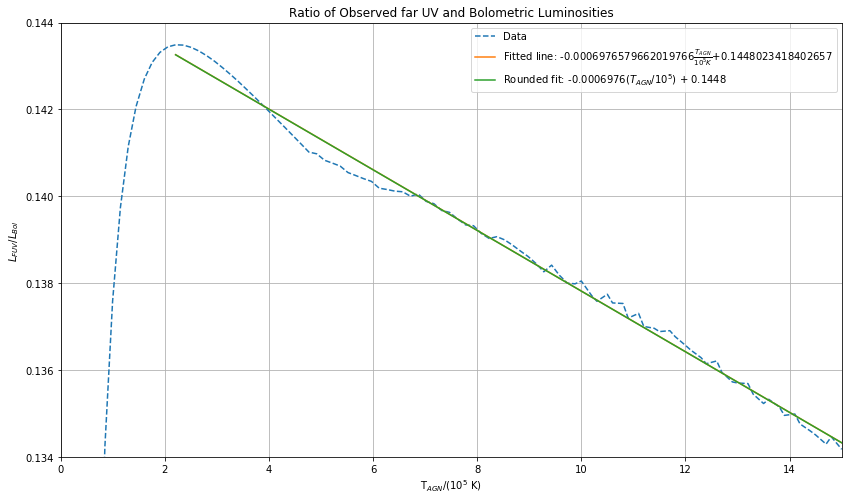

0.14348765670794397
[0.16164567 0.03052469 0.09119537]
[ 8.56327135e-05 -9.52537847e+00  1.39270683e-01]
[-0.00069766  0.14480234]
12


In [12]:
def f1(x_val, a_val, b_val, c_val):
    return (a_val) - (b_val/(x_val+c_val))

def f2(x_val, d_val, e_val, f_val):
    return d_val*((x_val+e_val)**2)+f_val

def f3(x_val, g_val, h_val):
    return g_val*(x_val)+h_val

from scipy.optimize import curve_fit as fit

x_fit1 = []
y_fit1 = []

x_fit2 = []
y_fit2 = []

x_fit3 = []
y_fit3 = []

for val in range(len(x)):
    if x[val] > 0 and x[val] < 2.3:
        x_fit1.append(x[val])
        y_fit1.append(y2[val])
    if x[val] < 6.9 and x[val] > 2.2:
        x_fit2.append(x[val])
        y_fit2.append(y2[val])
    if x[val] >2.2 :
        x_fit3.append(x[val])
        y_fit3.append(y2[val])
    else:
        continue

popt1, pcov1 = fit(f1, x_fit1, y_fit1)
popt2, pcov2 = fit(f2, x_fit2, y_fit2)
popt3, pcov3 = fit(f3, x_fit3, y_fit3)

a, b, c = popt1[0], popt1[1], popt1[2]
d, e, f = popt2[0], popt2[1], popt2[2]
g, h = popt3[0], popt3[1]

Fitted1 = []
Fitted2 = []
Fitted3 = []

for i in range(len(x_fit1)):
    Fitted1.append(f1(x_fit1[i], a, b, c))
    
for i in range(len(x_fit3)):
    #Fitted2.append(f2(x_fit2[i], d, e, f))
    Fitted2.append(f3(x_fit3[i], -6.976e-4, 0.1448))
for i in range(len(x_fit3)):
    Fitted3.append(f3(x_fit3[i], g, h))

plt.figure(figsize = (14,8))
plt.plot(x, y2, "--", label = "Data")
plt.plot(x_fit3, Fitted3, label = r"Fitted line: "+str(g)+r"$\frac{T_{AGN}}{10^5 K}$+"+str(h))
plt.plot(x_fit3, Fitted2, label = r"Rounded fit: "+str(-6.976e-4)+r"($T_{AGN}$/10$^{5}$) + "+str(0.1448))

plt.ylabel(r"$L_{FUV}/L_{Bol}$")
plt.xlabel(r"T$_{AGN}$/($10^5$ K)")
plt.title(r"Ratio of Observed far UV and Bolometric Luminosities")
plt.ylim(0.134, 0.144)
plt.xlim(0, 15)
plt.legend()
plt.grid()
plt.show()

print(max(y2))
print(popt1)
print(popt2)
print(popt3)
print(count)

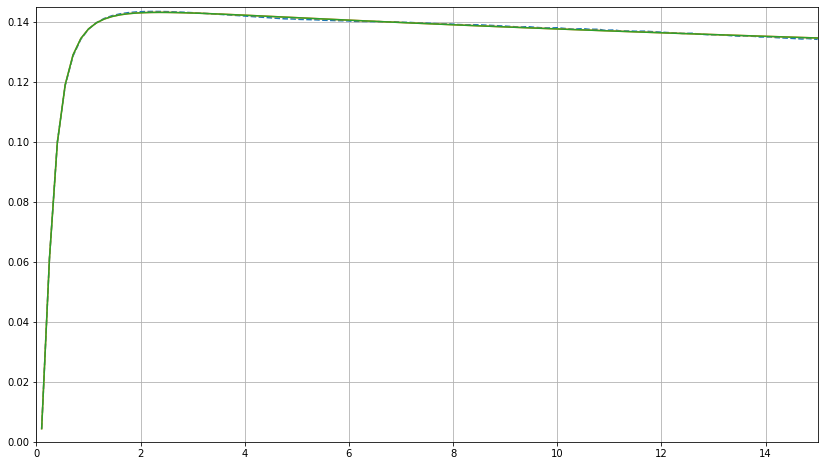

[-1.76807245e-03  4.90119638e-01 -3.95681517e-03  6.15757974e-02
  2.12264008e+00  5.95434867e-02  2.54705916e+00]


In [4]:
def curve(x, a, b, c, d, e, f, g):
    return g*((a*(x**b)) + (c/(d+(x**e))) + f)
popt_T, pcov_T = fit(curve, x, y2)

y_T = []
y_T2 = []
for j in range(len(x)):
    y_T.append(curve(x[j], popt_T[0], popt_T[1], popt_T[2], popt_T[3], popt_T[4], popt_T[5], popt_T[6]))
    y_T2.append(curve(x[j], -1.768e-3, 4.901e-1, -3.957e-3, 6.158e-2, 2.123, 5.954e-2, 2.547))
plt.figure(figsize = (14,8))
plt.plot(x, y2, "--", label = "data")
plt.plot(x,y_T, label = "curve_fit values")
plt.plot(x, y_T2, label = "Rounded values")
plt.ylim(0, 0.145)
plt.xlim(0, 15)
plt.grid()
plt.show()

print(popt_T)

In [5]:
def curve(x, L):
    a = -1.768e-3
    b = 4.901e-1
    c = -3.957e-3
    d = 6.158e-2
    e = 2.123
    f = 5.954e-2
    g = 2.547
    return g*((a*(x**b)) + (c/(d+(x**e))) + f)*L

print(curve(25, 1))

0.12982823341385963
